# Main Dashboard of Workloads Characterizations experiments in pre silicon

In [1]:
%matplotlib inline
results_file = 'results.csv'
import os
from pca.analytics import *
from pre_silicon.presi_data_gen import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

# Characterization of worklaods based on instructions kind

In [2]:
df = pd.read_csv("intel_presilicon/Category.csv")
df_gnr = df.loc[df['Platform'] == "GNR"]
df_global = df_gnr.pivot_table('Percentage', ['Platform', 'Workload'], 'Group')
df_global.reset_index(inplace=True)
df_global.rename(columns = {'Workload':'test_name'}, inplace = True)
df_global.drop(['Platform'], axis=1, inplace=True)

df_global.set_index('test_name')

df_global.fillna(0, inplace=True)
df_global.to_csv('results.csv')

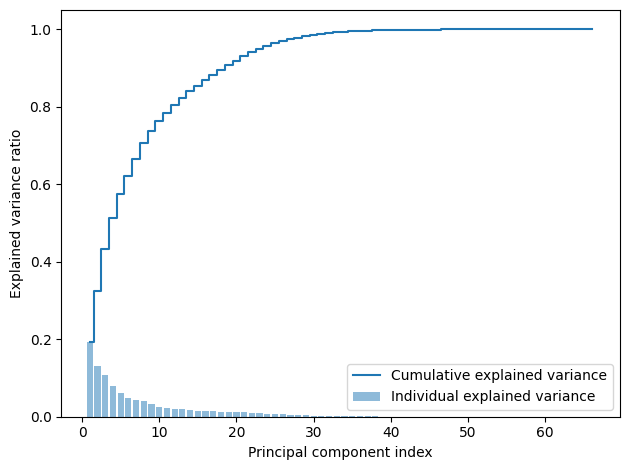

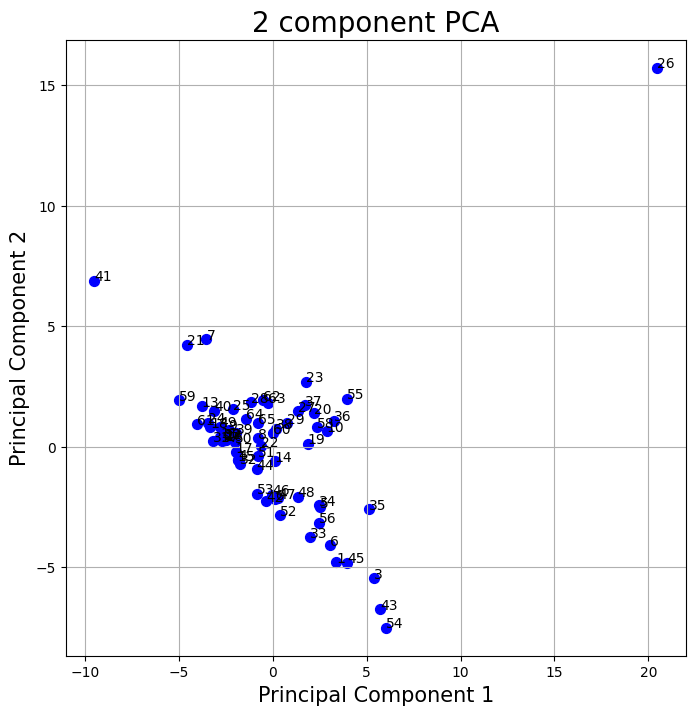

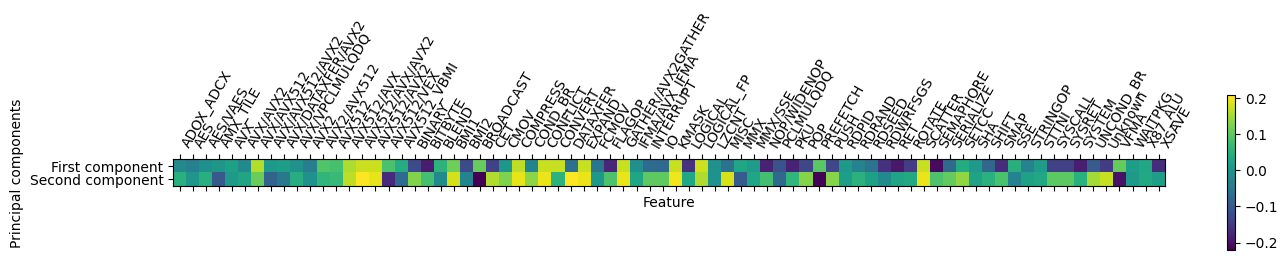

In [3]:

features = list(df_global.columns)[1:]
test_column = list(df_global.columns)[0]
pca_df = get_PCA(df_global, features, test_column)

# Plot characteristics of the worklaods

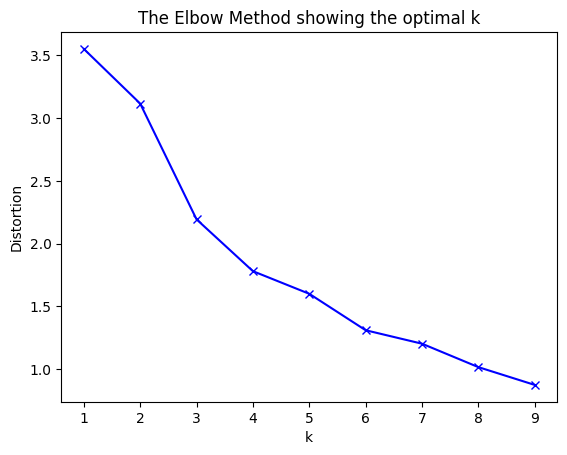

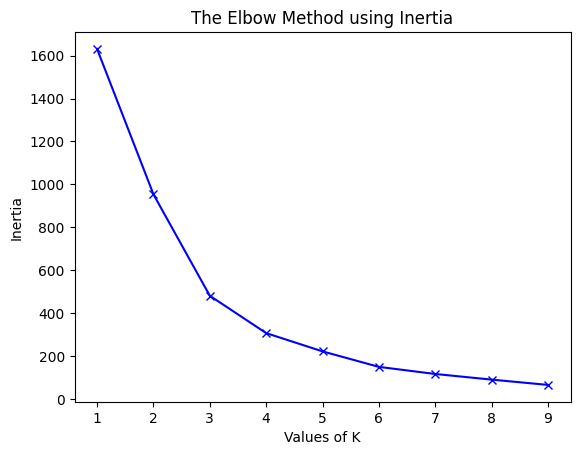

4


In [8]:
clusters = calculate_elbow(pca_df )

In [9]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 4


## Clasification based on optimal number of clusters

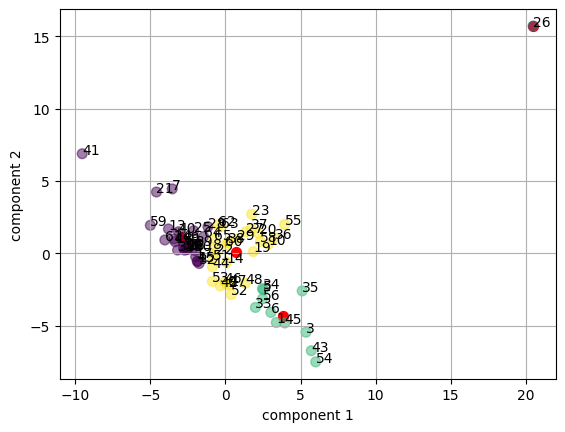

    PRED            test_name
0      0       BST-TensorFlow
0      0  Bert-Large-OpenVINO
0      0            BoringSSL
0      0            Cassandra
0      0           ClickHouse
..   ...                  ...
3      3            WasmBench
3      3        Wide-and-deep
3      3         WordPress5MT
3      3         WordPress6MT
3      3   scikit-learn_bench

[66 rows x 2 columns]


In [6]:
df_result,kmeans = kmean_cluster("pca.csv",clusters)
print(df_result)

# Get the test cases closer to centroid

In [7]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
pca_df.iloc[closest]

,Unnamed: 0,principal component 1,principal component 2,test_name
49,49,-2.845930,0.831697,RoBERTa-PyTorch
26,26,20.487536,15.714695,HPC-LAMMPS
45,45,3.947940,-4.818770,ResNet-50-Pytorch
38,38,0.164076,0.745238,OpenSSL3-RSAMB
